In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from nn.Trainer import Trainer
from nn.Loss import CrossEntropy
from nn.Optimizer import SGD
from nn.Dataloader import Dataloader
from nn.Activation import Softmax

In [2]:
nb_sample = 1000
nb_classes = 4
features = 2

In [3]:
X,y = make_blobs(n_samples=1000,
                 n_features=2,
                 centers=4
                 )
X.shape,y.shape

((1000, 2), (1000,))

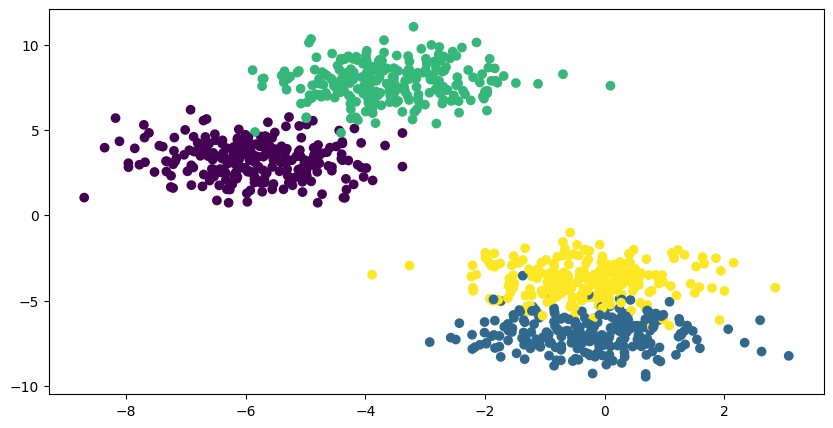

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
from nn.Module import Sequential,Linear

In [6]:
model = Sequential(
    Linear(features,10),
    Linear(10,10),
    Linear(10,nb_classes)
)

In [7]:
pred = model(X)
pred.shape

(1000, 4)

In [8]:
x_min,x_max = X[:,0].min(),X[:,0].max()
y_min,y_max = X[:,1].min(),X[:,1].max()
x_min,x_max,y_min,y_max

(np.float64(-8.694888252015835),
 np.float64(3.0754990885047677),
 np.float64(-9.468805361180586),
 np.float64(11.045860368994088))

In [9]:
mesh_x,mesh_y = np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                            np.arange(start=y_min,stop=y_max,step=0.1)
                            )
mesh_x.shape,mesh_y.shape

((206, 118), (206, 118))

In [10]:
x = np.column_stack((mesh_x.flatten(), mesh_y.flatten()))
x.shape

(24308, 2)

In [11]:
predictions = model(x)
predictions.shape

(24308, 4)

In [12]:
pred = predictions.argmax(axis=-1,keepdims=True)
pred.shape

(24308, 1)

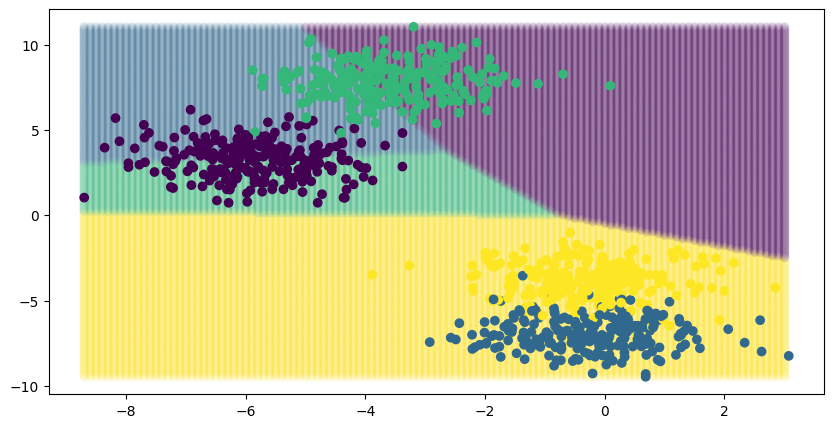

In [13]:
plt.figure(figsize=(10,5))

plt.scatter(x[:,0],x[:,1],c=pred,alpha=0.1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [14]:
class_model = Sequential(
    Linear(features,10),
    Linear(10,10),
    Linear(10,nb_classes),
    Softmax(),
)

In [15]:
batch_size = 32
learning_rate = 0.00001

dataloader = Dataloader(batch_size=batch_size,
                        dataset=X,
                        targets=y)
optimizer = SGD(lr=learning_rate)
loss_fn = CrossEntropy()

trainer = Trainer(model=class_model,
                  loss=loss_fn,
                  optimizer=optimizer)


In [16]:
hist = trainer.train(dataloader, 1)
hist

Epochs:1/1 batch:0/31 loss:98.26
Epochs:1/1 batch:1/31 loss:145.06
Epochs:1/1 batch:2/31 loss:132.11
Epochs:1/1 batch:3/31 loss:132.11
Epochs:1/1 batch:4/31 loss:nan
Epochs:1/1 batch:5/31 loss:nan
Epochs:1/1 batch:6/31 loss:nan
Epochs:1/1 batch:7/31 loss:nan
Epochs:1/1 batch:8/31 loss:nan
Epochs:1/1 batch:9/31 loss:nan
Epochs:1/1 batch:10/31 loss:nan
Epochs:1/1 batch:11/31 loss:nan
Epochs:1/1 batch:12/31 loss:nan
Epochs:1/1 batch:13/31 loss:nan
Epochs:1/1 batch:14/31 loss:nan
Epochs:1/1 batch:15/31 loss:nan
Epochs:1/1 batch:16/31 loss:nan
Epochs:1/1 batch:17/31 loss:nan
Epochs:1/1 batch:18/31 loss:nan
Epochs:1/1 batch:19/31 loss:nan
Epochs:1/1 batch:20/31 loss:nan
Epochs:1/1 batch:21/31 loss:nan
Epochs:1/1 batch:22/31 loss:nan
Epochs:1/1 batch:23/31 loss:nan
Epochs:1/1 batch:24/31 loss:nan
Epochs:1/1 batch:25/31 loss:nan
Epochs:1/1 batch:26/31 loss:nan
Epochs:1/1 batch:27/31 loss:nan
Epochs:1/1 batch:28/31 loss:nan
Epochs:1/1 batch:29/31 loss:nan
Epochs:1/1 batch:30/31 loss:nan
Epochs:

[np.float64(98.2589),
 np.float64(145.0629),
 np.float64(132.1108),
 np.float64(132.1108),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan)]

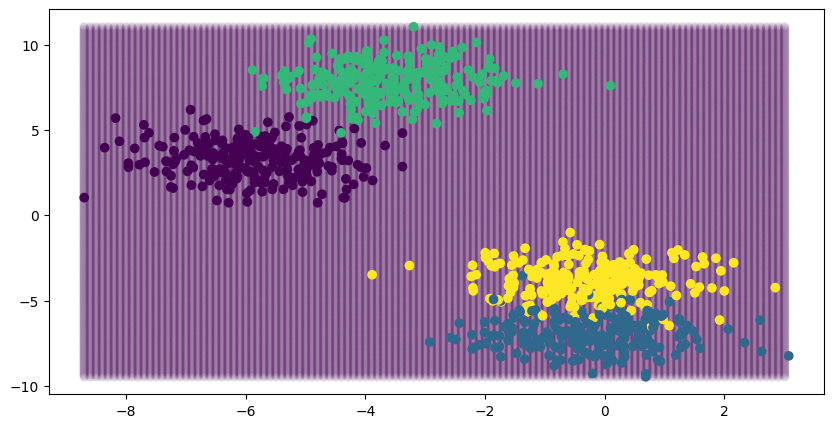

In [17]:
pred = class_model(x)
pred = pred.argmax(axis=-1,keepdims=True)
plt.figure(figsize=(10,5))
plt.scatter(x[:,0],x[:,1],c=pred,alpha=0.1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()